In [1]:
import os
import numpy as np
import pandas as pd
from dataset_path import output_path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
from thesis_helper import *

pd.set_option('float_format', '{:.3f}'.format)
path = output_path

output_path = os.path.join(path, "Figure3")
if not os.path.exists(output_path):
    os.makedirs(output_path)
df_train = pd.read_csv((os.path.join(path, 'train.csv')))
df_test = pd.read_csv((os.path.join(path, 'test.csv')))
confidence_interval = 95
random_seed = 0
result_list = []

In [2]:
df_train = df_train[(df_train['outcome_hospitalization'] == False)]
df_test = df_test[(df_test['outcome_hospitalization'] == False)].reset_index()
outcome = "outcome_ed_revisit_3d"
variable = ["age", "gender", 
            
            "n_ed_30d", "n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
            "n_hosp_365d", "n_icu_30d", "n_icu_90d", "n_icu_365d", 
            
            "triage_pain", "triage_acuity",
            
            "chiefcom_chest_pain", "chiefcom_abdominal_pain", "chiefcom_headache", 
            "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope",
            "chiefcom_dizziness",
            
            "cci_MI", "cci_CHF", "cci_PVD", "cci_Stroke", "cci_Dementia", "cci_Pulmonary", 
            "cci_Rheumatic", "cci_PUD", "cci_Liver1", "cci_DM1", "cci_DM2", 
            "cci_Paralysis", "cci_Renal", "cci_Cancer1", "cci_Liver2", "cci_Cancer2", 
            "cci_HIV",
            
            "eci_Arrhythmia", "eci_Valvular", "eci_PHTN",  "eci_HTN1", "eci_HTN2",  
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", 
            "eci_Obesity", "eci_WeightLoss", "eci_FluidsLytes", "eci_BloodLoss", 
            "eci_Anemia", "eci_Alcohol", "eci_Drugs", "eci_Psychoses", "eci_Depression",
            
            "ed_temperature_last", "ed_heartrate_last", "ed_resprate_last", 
            "ed_o2sat_last", "ed_sbp_last", "ed_dbp_last", "ed_los", "n_med", "n_medrecon"]


X_train = df_train[variable].copy()
y_train = df_train[outcome].copy()

X_test = df_test[variable].copy()
y_test = df_test[outcome].copy()

resample_freq = '1H' #'30T'
df_vitalsign = pd.read_csv(os.path.join(path, 'ed_vitalsign_' + resample_freq + '_resampled.csv'))
encoder = LabelEncoder()
X_train['gender'] = encoder.fit_transform(X_train['gender'])
X_test['gender'] = encoder.transform(X_test['gender'])
X_train['ed_los'] = pd.to_timedelta(X_train['ed_los']).dt.seconds / 60
X_test['ed_los'] = pd.to_timedelta(X_test['ed_los']).dt.seconds / 60


In [36]:
def get_score_performance(s, random_seed=0):
    print(s)
    score = np.array(df_test[s])
    result = PlotROCCurve(score,y_test, ci=confidence_interval, random_seed=random_seed)
    runtime = 0
    results = [s]
    results.extend(result)
    results.append(runtime)
    result_list.append(results)

def find_sens_speci_news(s,y_test):
    new_yp = []
    for x in s:
        if x >= 7:
            new_yp.append(True)
        else:
            new_yp.append(False )
    cm1 = confusion_matrix(y_test,new_yp)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    f = f1_score(y_test,new_yp)

    return f, accuracy1, sensitivity1, specificity1

def find_sens_speci_mews(s,y_test):
    new_yp = []
    for x in s:
        if x >= 5:
            new_yp.append(True)
        else:
            new_yp.append(False )
    cm1 = confusion_matrix(y_test,new_yp)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    f = f1_score(y_test,new_yp)

    return f, accuracy1, sensitivity1, specificity1

def find_sens_speci_cart(s,y_test):
    new_yp = []
    for x in s:
        if x >= 12:
            new_yp.append(True)
        else:
            new_yp.append(False )
    cm1 = confusion_matrix(y_test,new_yp)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    f = f1_score(y_test,new_yp)

    return f, accuracy1, sensitivity1, specificity1

score_NEWS
AUC: 0.542298560069473
AUPRC: 0.055394376722718644
Sensitivity: 0.5237873134328358
Specificity: 0.5482239557241346
Score thresold: 1
2.5 97.5


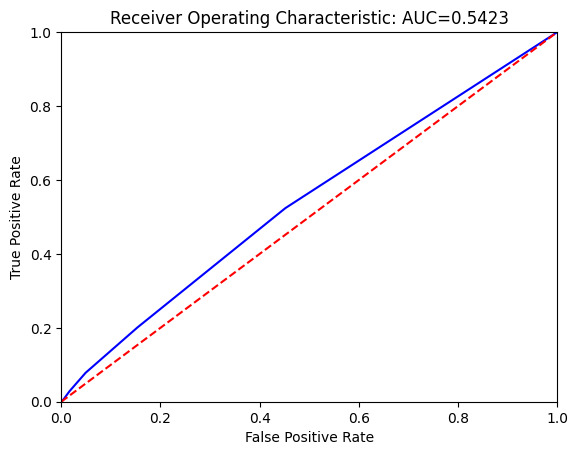

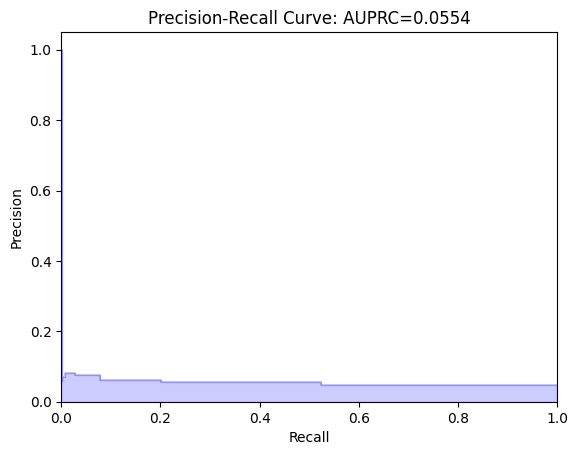

In [33]:
get_score_performance('score_NEWS', random_seed=0)

score_MEWS
AUC: 0.521481783186693
AUPRC: 0.05175089774409829
Sensitivity: 0.2248134328358209
Specificity: 0.8128772155824328
Score thresold: 2
2.5 97.5


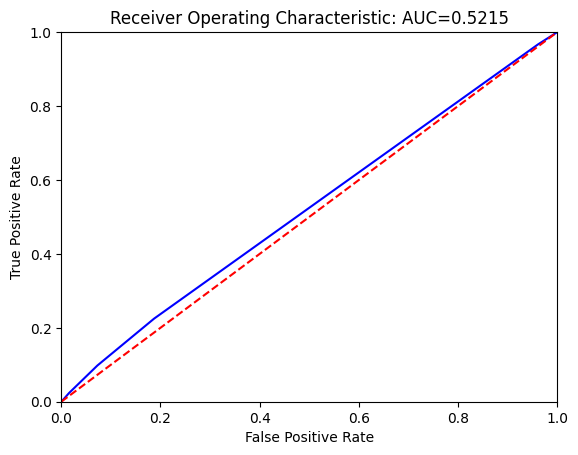

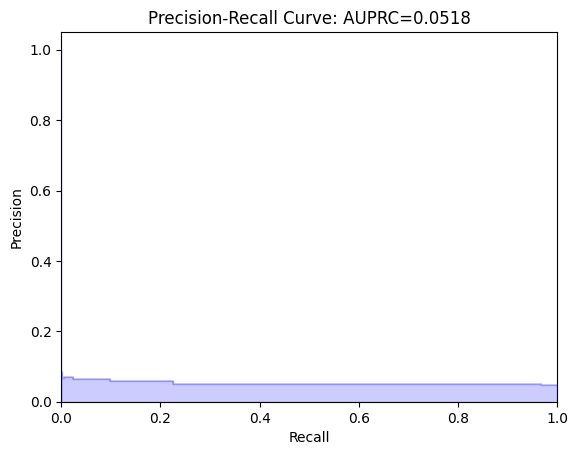

In [34]:
get_score_performance('score_MEWS', random_seed=0)

score_CART
AUC: 0.5370552779382982
AUPRC: 0.053280934245651085
Sensitivity: 0.4855410447761194
Specificity: 0.5865836494191179
Score thresold: 4
2.5 97.5


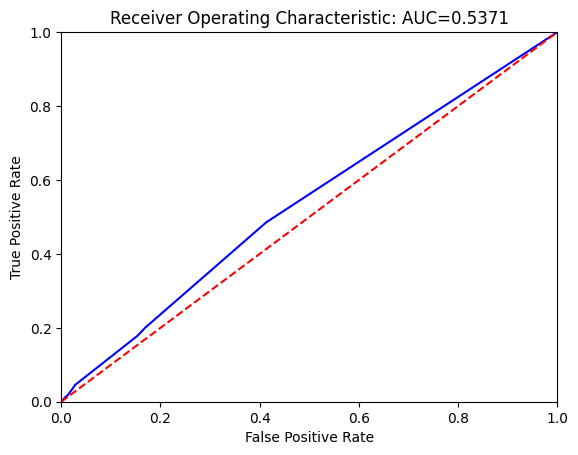

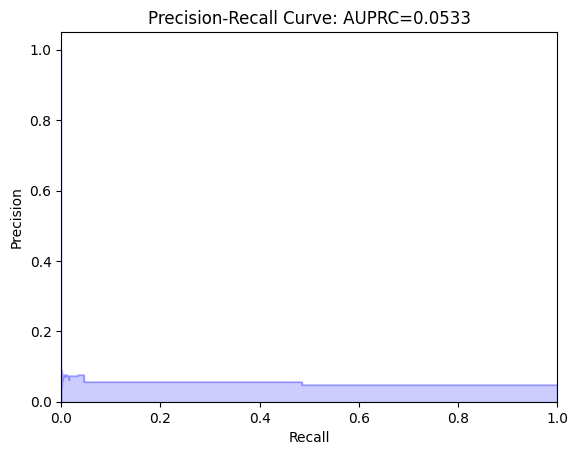

In [39]:
get_score_performance('score_CART', random_seed=0)

In [28]:
find_sens_speci_news(np.array(df_test['score_NEWS']),y_test)

(0.0027573529411764708,
 0.9507523318884324,
 0.9993081896037597,
 0.0013992537313432835)

In [31]:
find_sens_speci_mews(np.array(df_test['score_MEWS']),y_test)

(0.011144449207029576,
 0.9476431473118035,
 0.9958014265607481,
 0.006063432835820896)

In [37]:
find_sens_speci_cart(np.array(df_test['score_CART']),y_test)

(0.05774278215223098,
 0.9266731725030071,
 0.9717073403468595,
 0.04617537313432836)

In [ ]:
find_sens_speci_cart(np.array(df_test['score_CCI']),y_test)